## Support Vector Machine Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lets create a synthetic data points
from sklearn.datasets import make_regression

In [14]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [15]:
X

array([[-0.02048014, -1.58840202],
       [ 0.04719919,  2.01810682],
       [-0.29704402, -0.02174145],
       ...,
       [ 0.28111613,  0.70295654],
       [-0.21805281, -0.55376311],
       [-0.5885405 , -0.92628783]])

In [16]:
y

array([-1.31825394e+02,  1.67539686e+02, -1.95773786e+01, -1.01571222e+01,
        2.18704682e+02,  4.92587197e+01, -1.17204324e+02, -2.08143056e+02,
       -2.82639045e+01, -7.46613101e+01,  1.10453754e+02, -2.31618589e+02,
       -1.61304588e+01,  4.17443728e+00,  2.97152184e+02, -3.17248986e+01,
       -7.97504891e+01, -1.79071082e+02, -1.16255220e+02, -2.77364526e+01,
       -1.39497573e+02, -9.15272105e+01,  3.81706783e+01, -1.67609290e+02,
       -6.57293881e+01,  2.57279532e+02,  1.67037709e+02, -4.28094137e+01,
        5.99053972e+01, -1.85080826e+02,  2.32591778e+01,  1.36633105e+02,
       -2.58010964e+02, -1.14039033e+01, -8.91265887e+01, -4.15359850e+00,
       -2.35449787e+02, -9.75844463e+01,  4.68756776e+00,  9.93276628e+01,
       -5.64374666e+01,  5.64565290e+01,  9.60284872e+01,  2.01852966e+02,
       -1.00008808e+02, -6.67931361e+01, -2.99078861e+01,  2.14467849e+02,
        1.30234767e+01, -6.23924624e+01, -1.42047094e+02,  1.51661363e+02,
        7.44246499e+01,  

<AxesSubplot: xlabel='0', ylabel='1'>

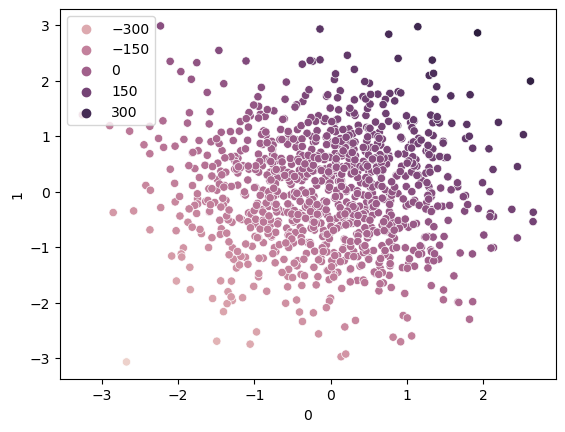

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [19]:
from sklearn.svm import SVR

In [20]:
svr=SVR(kernel='linear')

In [22]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [23]:
svr.coef_

array([[73.18501037, 81.79051357]])

In [24]:
y_pred=svr.predict(X_test)

In [25]:
y_pred

array([ 118.32430799,  173.34615847,   61.34772896,  -21.20466862,
         89.83572312,  -67.3464118 ,  128.62014874,   -6.10997061,
       -227.30181834,   33.4771689 ,   21.94751485,  -40.69258188,
       -193.32698709,  103.94172216,  108.26374868,  -23.70803779,
        -96.04650895,   37.94825484, -112.41438599, -181.9806823 ,
         95.13187239, -162.88863283,   -7.98690876,   16.24920846,
         63.10538431,  -81.47838929, -116.69757758, -167.10147246,
         75.41658145,   82.627808  ,  -62.22786615,  129.32113032,
       -126.73307562,  -19.52221293, -118.984453  ,   73.86622539,
         62.59134752,   39.56816613,  103.36627122,  -34.8246365 ,
         25.43757428,  202.5570547 ,  -34.12309136,  -95.12149097,
         94.38326733, -122.29761542,  -44.50751574, -152.21401319,
         63.54228939,  -48.3035475 ,  -39.74182967,  -75.47252151,
         -6.1576852 ,   98.36566031,  -24.12150282,  118.60821656,
       -224.46671894,  160.57650297,  -36.38229797,   33.77577

In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9992706437904176


### Hyperparameter Tuning with SVR

In [37]:
from sklearn.model_selection import GridSearchCV
 
#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma': [1,0.1,0.001,0.0001],
           'kernel': ['linear'],
           'epsilon': [0.1,0.2,0.3]}

In [38]:
grid=GridSearchCV(SVR(),param_grid=param_grid,scoring='neg_mean_squared_error' ,refit=True,cv=5,verbose=3)

In [39]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2679.885 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-5003.083 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-4039.057 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-4348.107 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3844.995 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2679.885 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-5003.083 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-4039.057 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-4348.107 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3844.995 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [40]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [42]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9993354639047786
